## Task 1: Introduction


Starter notebook for the Coursera Guided Project [Creating Multi Task Models With Keras](https://www.coursera.org/projects/multi-task-models-keras)

In [1]:
%matplotlib inline
%load_ext tensorboard

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil

try:
  shutil.rmtree('logs')
except:
  pass

2022-09-29 15:24:42.336550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 15:24:42.684422: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 15:24:44.242900: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-29 15:24:44.243161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

## Task 2: Create Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("x_train -> ","size :",x_train.size, "| shape :",x_train.shape)
print("x_test  -> ","size :",x_test.size, "| shape :",x_test.shape)
print("y_train -> ","size :",y_train.size, "| shape :",y_train.shape)
print("y_test  -> ","size :",y_test.size, "| shape :",y_test.shape)

x_train ->  size : 47040000 | shape : (60000, 28, 28)
x_test  ->  size : 7840000 | shape : (10000, 28, 28)
y_train ->  size : 60000 | shape : (60000,)
y_test  ->  size : 10000 | shape : (10000,)


In [4]:
def create_example(x, y):
    # Defining Color label
    c = np.random.randint(0, 2) # Taking 0 or 1 as a random input

    # Converting B/W MNIST image to Red or Green Color Dominant Image
    image = 0.5 * np.random.rand(28, 28, 3) # 28x28 is image resolution and 3 is color attribute
    image[:, :, c] += 0.5 * x/255 # Adding Normalized Color attribute to MNIST image 
    return image, y, c

Digit : 3
Color : green


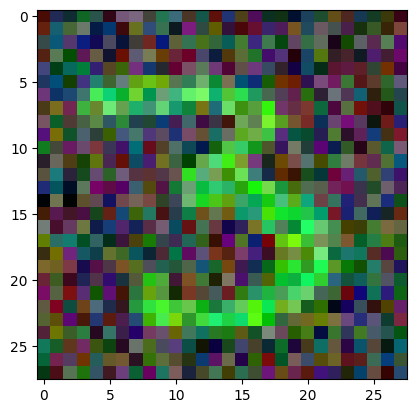

In [5]:
colors = {0 : "red", 1 : "green"}

x, y, c = create_example(x_train[12], y_train[12])
print("Digit :",y)
print("Color :",colors[c])

plt.imshow(x)
plt.show()

## Task 3: Dataset Generator

In [6]:
# Generator to be used for training and testing
# Default batch_size = 32
def generate_data(x, y, batch_size=32):
    # Total numbers of examples
    num_examples = len(y)

    while True:
        x_batch = np.zeros((batch_size, 28, 28, 3)) # Current shape of images after adding noise
        y_batch = np.zeros((batch_size,)) # y values will be in range of [0-9]
        c_batch = np.zeros((batch_size,)) # c values will be in range of [0-1] --> Color Values

        for i in range(0, batch_size):
            # Taking a random index/ example
            index = np.random.randint(0, num_examples)
            image, digit, color = create_example(x[index], y[index])
            x_batch[i] = image
            y_batch[i] = digit
            c_batch[i] = color
        
        # YIELD --> returns single item in a list after processed
        yield x_batch, [y_batch, c_batch]

[3.] red


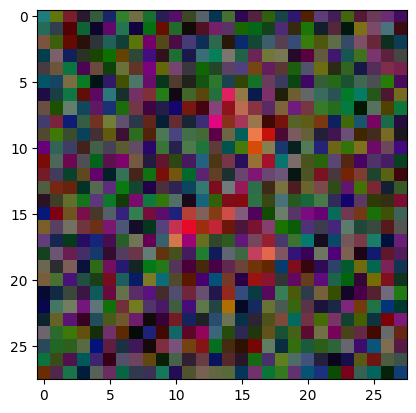

In [17]:
x, [y, c] = next(generate_data(x_test, y_test, batch_size=1))

print(y, colors[c[0]])
plt.imshow(x[0])